# ML Models

Applying some ML models to compare their performance, and do the model selection, including LR, KNN, NN, RF

## Linear Regression

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
# Assuming the data is saved in "data.csv" and the target variable is "target"
data = pd.read_csv("../data/curated/train/train_data_2023.csv")

# Extract features and target
X = data[["avg_income", "avg_population", "avg_crime"]]
y = data["price"]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model_lr
model_lr = LinearRegression()

# Train the model_lr on the training data
model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculate the mean squared error between predicted and actual values
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse_lr}")

# Print the model_lr's intercept and coefficients
print(f"Intercept: {model_lr.intercept_}")
print(f"Coefficients: {model_lr.coef_}")



Mean Squared Error: 14931.444813120586
Intercept: 240809911260626.47
Coefficients: [-1.11530615e+10  3.11560707e+10  2.56898431e+00]


## KNN MODEL

### Test which k is the best one

Optimal k value: 1
Minimum error: 2138.657772254083


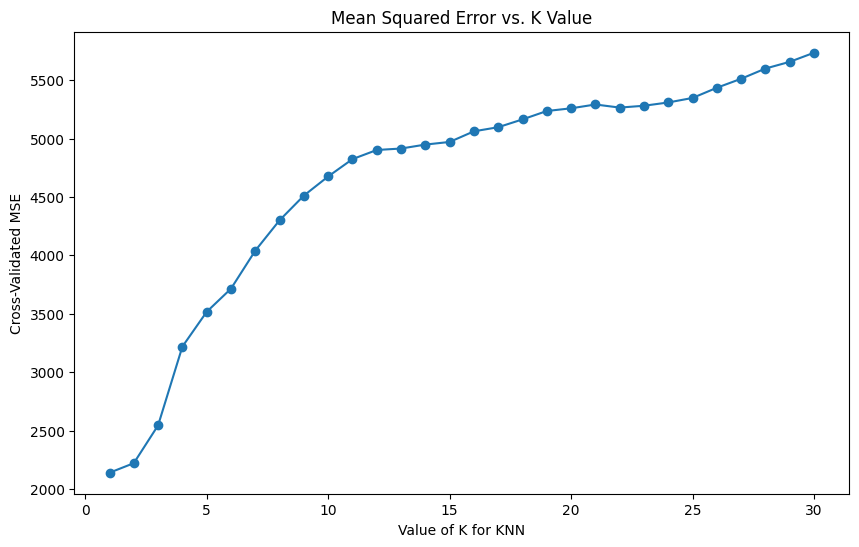

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Define a range of k values
k_values = range(1, 31)
cross_val_errors = []

# Use 5-fold cross-validation to calculate error for each k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_val_errors.append(-scores.mean())

# Find the optimal k value and its corresponding error
optimal_k = k_values[np.argmin(cross_val_errors)]
min_error = min(cross_val_errors)
print(f"Optimal k value: {optimal_k}")
print(f"Minimum error: {min_error}")

# Plot error vs. k value
plt.figure(figsize=(10,6))
plt.plot(k_values, cross_val_errors, marker='o', linestyle='-')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.title('Mean Squared Error vs. K Value')
plt.show()


### Train knn model

In [28]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=12)

# Train the model_knn on the training data
model_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_knn.predict(X_test)

# Calculate the mean squared error between the predicted and actual values
mse_knn = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_knn}")

Mean Squared Error: 5477.62264195581


## Train the neural network model

In [29]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Feature Scaling (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the neural network model_nn
model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model_nn
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model_nn on the scaled training data
model_nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model_nn
mse_nn = model_nn.evaluate(X_test_scaled, y_test)
print(f"NN Mean Squared Error on Test Set: {mse_nn}")

4/4 [==============================] - 0s 2ms/step - loss: 18812.0762
NN Mean Squared Error on Test Set: 18812.076171875


## Train the random forest model

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForest regressor
rf = RandomForestRegressor()

# Use GridSearch with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=1, verbose=0, scoring='neg_mean_squared_error')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
# print(grid_search.best_params_)

# Build the model using the best parameters
best_rf = grid_search.best_estimator_


In [31]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model_rf with the best parameters
model_rf = RandomForestRegressor(
    n_estimators=100, 
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=10,
    bootstrap=True,
    random_state=42
)

# Train the model_rf on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Calculate the mean squared error between predicted and actual values
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

# Optionally, you can also inspect feature importances
feature_importances = model_rf.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")



Random Forest Mean Squared Error: 2220.68703055779
Feature: avg_income, Importance: 0.35239138395961295
Feature: avg_population, Importance: 0.32183339045986503
Feature: avg_crime, Importance: 0.32577522558052213


In [32]:
model_names = ["LR", "KNN", "NN", "RF"]  
mse_values = [mse_lr, mse_knn, mse_nn, mse_rf]  

model_selection = pd.DataFrame({'model': model_names, 'mse': mse_values})

model_selection

,model,mse
0,LR,14931.444813
1,KNN,5477.622642
2,NN,18812.076172
3,RF,2220.687031


## Add predicted values to the table

In [33]:
sa2_postcode = pd.read_csv('../data/raw/Processed_SA2_Postcode.csv')

In [34]:
def prediction_postcode(sa2_postcode, year):

    """
    Make rental price predictions for different postcodes in a specific year using a K-Nearest Neighbors (KNN) model.

    Parameters:
    - sa2_postcode: The SA2 postcode or area for which predictions are being made.
    - year: The year for which rental price predictions are needed.

    The function loads test data for the specified year, uses a KNN model to make predictions, and then calculates the average
    rental price for each postcode. The results are saved back to the test data file.
    """

    df = pd.read_csv(f"../data/curated/predict/rental_price/test_data_{year}.csv")
    test_data = df[["avg_income", "avg_population", "avg_crime"]]
    pred = model_knn.predict(test_data)

    df['price'] = pred

    # Group by 'postcode' and calculate the average price for each postcode
    avg_price = df.groupby('postcode')['price'].mean().reset_index()

    avg_price.to_csv(f"../data/curated/predict/rental_price/test_data_{year}.csv", index=False)

    return

In [35]:
YEARS = [2024, 2025, 2026]

for year in YEARS:
    prediction_postcode(sa2_postcode, year)

In [36]:
df_2023 = pd.read_csv('../data/curated/train/train_data_2023.csv')
df_2026 = pd.read_csv('../data/curated/predict/rental_price/test_data_2026.csv')


# calculate the rate from 2023 to 2026
df_2026['Growth_Rate'] = (((df_2026['price'] - df_2023['price']) / df_2023['price']) * 100)
df_2026 = df_2026.dropna(subset=['Growth_Rate'])

In [37]:
# Sort by 'Growth_Rate' from high to low
sorted_grouped = df_2026.sort_values(by='Growth_Rate', ascending=False)
sorted_grouped = sorted_grouped[['postcode', 'Growth_Rate']]
sorted_grouped.to_csv('../data/curated/ML_growth_rate.csv', index=False)
sorted_grouped

,postcode,Growth_Rate
407,3540,86.067364
408,3542,86.067364
409,3544,86.067364
413,3551,86.067364
412,3550,86.067364
...,...,...
447,3595,-45.730352
487,3662,-48.922684
81,3089,-50.239864
65,3071,-51.490817
